<a href="https://colab.research.google.com/github/chaiminwoo0223/Computer-Vision/blob/main/Class6/program02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 컨볼루션 신경망으로 자연 영상 인식하기

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam

## 1.데이터 준비

In [2]:
(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
# [0, 1]로 정규화
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
# 원핫 코드로 변환
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## 2.모델 선택(신경망 구조 설계)

In [3]:
cnn = Sequential()
cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
cnn.add(Conv2D(32, (3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(Conv2D(64, (3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten()) # 1차원 구조로 변환
cnn.add(Dense(units=512, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(units=10, activation='softmax'))

## 3.학습

In [4]:
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test,y_test), verbose=2)

Epoch 1/100
391/391 - 12s - loss: 1.6641 - accuracy: 0.3857 - val_loss: 1.2943 - val_accuracy: 0.5363 - 12s/epoch - 31ms/step
Epoch 2/100
391/391 - 4s - loss: 1.2582 - accuracy: 0.5502 - val_loss: 1.0839 - val_accuracy: 0.6155 - 4s/epoch - 11ms/step
Epoch 3/100
391/391 - 4s - loss: 1.0896 - accuracy: 0.6149 - val_loss: 0.9637 - val_accuracy: 0.6601 - 4s/epoch - 10ms/step
Epoch 4/100
391/391 - 4s - loss: 0.9675 - accuracy: 0.6605 - val_loss: 0.8691 - val_accuracy: 0.6984 - 4s/epoch - 10ms/step
Epoch 5/100
391/391 - 4s - loss: 0.8909 - accuracy: 0.6871 - val_loss: 0.8005 - val_accuracy: 0.7219 - 4s/epoch - 11ms/step
Epoch 6/100
391/391 - 4s - loss: 0.8242 - accuracy: 0.7101 - val_loss: 0.7900 - val_accuracy: 0.7274 - 4s/epoch - 10ms/step
Epoch 7/100
391/391 - 4s - loss: 0.7766 - accuracy: 0.7294 - val_loss: 0.7249 - val_accuracy: 0.7468 - 4s/epoch - 10ms/step
Epoch 8/100
391/391 - 4s - loss: 0.7339 - accuracy: 0.7419 - val_loss: 0.7169 - val_accuracy: 0.7502 - 4s/epoch - 11ms/step
Epoch 

## 4.예측(성능 측정)

In [5]:
res = cnn.evaluate(x_test, y_test, verbose=0)
print('정확도 : ', res[1]*100)

정확도 :  80.62999844551086


## 5.성능 시각화
- 정확도

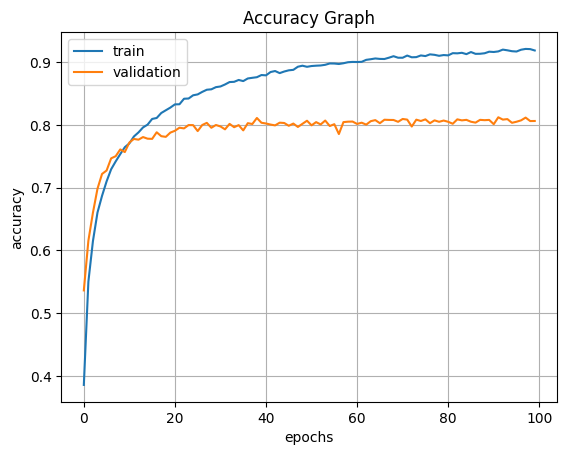

In [6]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])
plt.grid()
plt.show()

- 손실

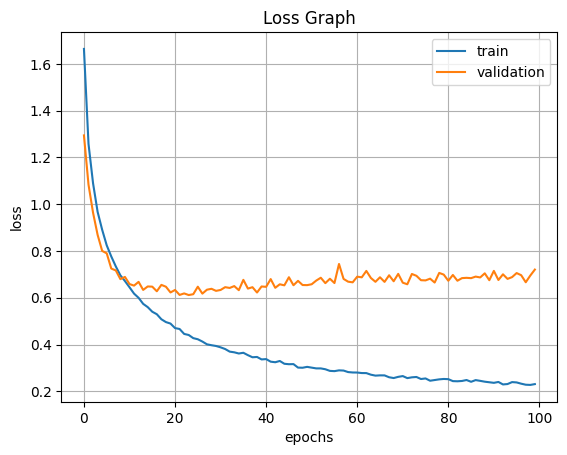

In [7]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.grid()
plt.show()